### Etape 1 : Importation packages

In [1]:
# Import packages

import math
from pathlib import Path
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D 
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


### Etape 2 : récupérer les données

In [2]:
with open("C:\\Users\\Uriel\\Desktop\\TP Thèse Doctoral ML\\4- KNN\\shipsnet.json") as data_file :
    dataset = json.load(data_file)
ships = pd.DataFrame(dataset)
ships.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


On va extraire "data et labels" pour la suite de notre étude

In [3]:
ships = ships[["data","labels"]]
ships.head()

,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1


### Etape 3 : Analyser les données

In [4]:
ships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    4000 non-null   object
 1   labels  4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


On va vérifier si la base de donnée est équilibré ou non

<AxesSubplot:xlabel='labels', ylabel='count'>

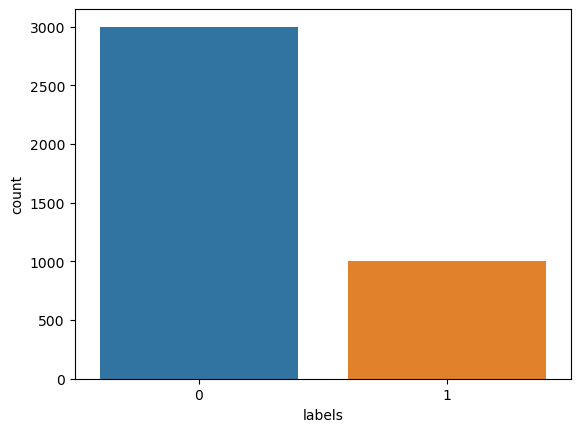

In [5]:
import seaborn as sns
sns.countplot(x="labels",data=ships)

### Etape 4 : Preparer les données en formation et en test
On va transformer les informations json en tableau numpy et ensuite les assigner comme variables x et y

In [6]:
ships.columns

Index(['data', 'labels'], dtype='object')

In [7]:
import numpy as np
X = np.array(dataset["data"]).astype("uint8")
y = np.array(dataset["labels"]).astype("uint8")

In [8]:
#X = ships[["data"]]
#y = ships["labels"]

In [9]:
X

array([[ 82,  89,  91, ...,  86,  88,  89],
       [ 76,  75,  67, ...,  54,  57,  58],
       [125, 127, 129, ..., 111, 109, 115],
       ...,
       [171, 135, 118, ...,  95,  95,  85],
       [ 85,  90,  94, ...,  96,  95,  89],
       [122, 122, 126, ...,  51,  46,  69]], dtype=uint8)

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

On va separer la base de donnée en sous-base pour l'entrainement et pour l'evaluation en utilisant la commande "train_test_split".
test_size(60% pour l'entrainnement et 20% pour l'évaluation)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train

array([[123, 126, 119, ..., 120, 122, 127],
       [105, 103, 103, ...,  76,  77,  86],
       [113, 108, 108, ...,  98,  97,  97],
       ...,
       [ 39,  39,  36, ...,  36,  36,  37],
       [ 43,  44,  55, ...,  59,  64,  69],
       [111, 113, 108, ...,  98,  99,  97]], dtype=uint8)

In [14]:
y_train

array([0, 1, 0, ..., 1, 0, 0], dtype=uint8)

**Normalisation ou mise à l'échelle des fonctionnalités**:
- Si la plage de valeurs des données brutes varie considérablement, nous devions normaliser les caractéristiques pour qu"elles soient à la même échelle.
**Remise à l'échelle des données de test en utilisant la moyenne et l'ecart type de l'ensemble de test**
- Dans le classificateur **KNN**, l'échelle des variables est importante. Toutes les variables à grande échelle auront un effet beaucoup plus important sur la distance entre les observations, et donc sur le classificateur KNN, que les variables à petite échelle.

**Redimensionner les fonctionnalité à l'aide de la classe "StandarScaler"**

In [15]:
from sklearn.preprocessing import StandardScaler

# On instancie notre modèle pour la standartisation
scaler = StandardScaler()

In [16]:
# Et on faire scaler.fit(X_train) sur la base de donnée d'entrainement car on entraine sur la base de donnée d'entrainement  
# puis évaluée avec la base de donnée X_test

scaler.fit(X_train)

StandardScaler()

In [17]:
print(scaler.mean_)
print(scaler.var_)

[97.770625  97.7021875 97.859375  ... 90.699375  90.5703125 90.5140625]
[1807.10426211 1801.60474521 1812.00147461 ... 1245.97712461 1242.30255615
 1228.78667725]


In [18]:
# Ensuite on va transformer la base de donnée X_train et X_test à partir de la base de donnée scaler.fit(X_train)
# Modification de X_train et X_test dans notre base de donnée et les assignés dans X_train_norm et X_test_norm

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [19]:
X_train_norm

array([[ 0.59349202,  0.66668872,  0.4966364 , ...,  0.83008363,
         0.89171562,  1.04084788],
       [ 0.17006273,  0.12481501,  0.12076377, ..., -0.41643175,
        -0.38501368, -0.12877434],
       [ 0.35825353,  0.24261364,  0.23822397, ...,  0.20682594,
         0.18242156,  0.18502675],
       ...,
       [-1.38251135, -1.38300747, -1.4532029 , ..., -1.54962755,
        -1.54825593, -1.52661552],
       [-1.28841595, -1.26520884, -1.00685414, ..., -0.89803997,
        -0.75384659, -0.61373965],
       [ 0.31120583,  0.36041228,  0.23822397, ...,  0.20682594,
         0.23916509,  0.18502675]])

**Mettez X_train et y_train en mise à l'échelle dans un format de trame de données à l'aide de pd.DataFrame**

In [20]:
# Création d'un nouveau DataFrame(X_train_norm pour les données d'entrainement et X_test_norm pour l'evaluation)

X_train_scaler = pd.DataFrame(data = X_train_norm)
X_test_scaler = pd.DataFrame(data = X_test_norm)

In [21]:
X_train_scaler.head()

,0,1,2,3,4,5,6,7,8,9,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
0,0.593492,0.666689,0.496636,0.584525,0.669746,0.612035,0.587801,0.473221,0.385445,0.362806,...,0.850661,1.086981,0.947408,0.766424,0.775201,0.969044,0.879523,0.830084,0.891716,1.040848
1,0.170063,0.124815,0.120764,0.115009,0.155747,0.103234,-0.012011,0.054910,0.152363,0.177601,...,-0.448328,-0.676358,-1.010570,-0.415775,-0.162693,-0.275042,-0.276956,-0.416432,-0.385014,-0.128774
2,0.358254,0.242614,0.238224,0.349767,0.272565,0.288253,0.380174,0.264066,0.222287,0.247053,...,0.342361,0.359254,0.248130,0.400505,0.263623,0.177353,0.146146,0.206826,0.182422,0.185027
3,0.005396,0.030576,-0.795426,-0.471885,0.786564,1.120835,0.887707,0.798573,1.271157,1.566637,...,2.432040,3.662016,3.800462,3.947104,3.986778,3.768236,3.728410,2.841506,1.969843,1.468758
4,0.852254,0.878726,0.872509,0.842759,0.786564,0.750798,0.749289,0.798573,0.828301,0.825818,...,0.822423,0.751107,0.779581,0.822719,0.746780,0.855945,0.851316,0.858414,0.891716,0.926738


**Visualisation des effets de la normalisation sur les données à l'aide de "displot" de seaborn**

In [22]:
#sns.displot(X_train_scaler, color ="green")
#sns.displot(X_train, color ="red")

In [23]:
X_train_scaler.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
count,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,...,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00,3200.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.11,-2.14,-2.13,-2.21,-2.23,-2.16,-2.11,-2.13,-2.18,-2.18,...,-2.23,-2.22,-2.21,-2.25,-2.44,-2.31,-2.22,-2.14,-2.29,-2.35
25%,-0.68,-0.68,-0.68,-0.66,-0.69,-0.66,-0.66,-0.67,-0.66,-0.66,...,-0.70,-0.70,-0.70,-0.70,-0.70,-0.70,-0.70,-0.70,-0.70,-0.70
50%,-0.14,-0.13,-0.14,-0.14,-0.15,-0.15,-0.14,-0.13,-0.15,-0.15,...,-0.11,-0.09,-0.09,-0.11,-0.09,-0.11,-0.11,-0.09,-0.10,-0.10
75%,0.50,0.50,0.50,0.49,0.51,0.48,0.50,0.52,0.48,0.50,...,0.57,0.58,0.56,0.57,0.58,0.57,0.57,0.58,0.58,0.58
max,3.70,3.71,3.69,3.68,3.66,3.62,3.61,3.63,3.65,3.63,...,4.35,4.36,4.28,4.31,4.33,4.36,4.38,4.46,4.52,4.58


### Etape 5 : Importer KNeighborsClassifier de scikit learn. Construire un modèle KNN pour la classification et entraîner le modèle. 

In [24]:
# Importation de KNeighborsClassifier de scikit learn
from sklearn.neighbors import KNeighborsClassifier

# Création de KNN et une instance nombre de voisins à 1 (n_neighbors = 1)
KNN = KNeighborsClassifier(n_neighbors = 3)

# Ajuster ce modèle KNN aux données d'entraînement(BD mise à l'échelle i.e X_train_scaler et labels correspondant: y_train)
KNN.fit(X_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=3)

### Etape 6 : Prédiction et évaluation

Utilisez la méthode predict pour prédire des valeurs à l'aide de votre modèle KNN et de X_test.

In [25]:
y_pred = KNN.predict(X_test_scaler)

**Évaluation de l'algorithme**: 
- On va évalué l'algorithme s'il efficace en utilisant les différents metrics

**Création de matrice de confusion et le rapport de classification**

In [26]:
# On commence à importer les metrics de la librairie Scaler
from sklearn import metrics

# Affichage de rapport de classification et la matrice de confusion
# A chaque fois pour les deux metrics, on va comparer leurs y_pred à la sortie avec leurs vraies valeurs i.e y_test
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       591
           1       0.86      0.88      0.87       209

    accuracy                           0.93       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.93      0.93      0.93       800

[[560  31]
 [ 25 184]]


**Interpretation**:

- **image avec navire (0)**: On constate que la 1ère classe de la matrice de confusion (560), tous n'a pas été predicte. on a une précision = 0.96, recall = 0.95, f1-score = 0.95 et le tout 591 cas.
- **image avec navire (1)**: Pour la 2ème classes de la matrice de confusion, on a 184 cas correctement predicte avec (précision = 0.86, recall = 0.88, f1-score = 0.87) et 209 cas.

**Accuracy de l'algorithme à 94 % pour 800 cas**

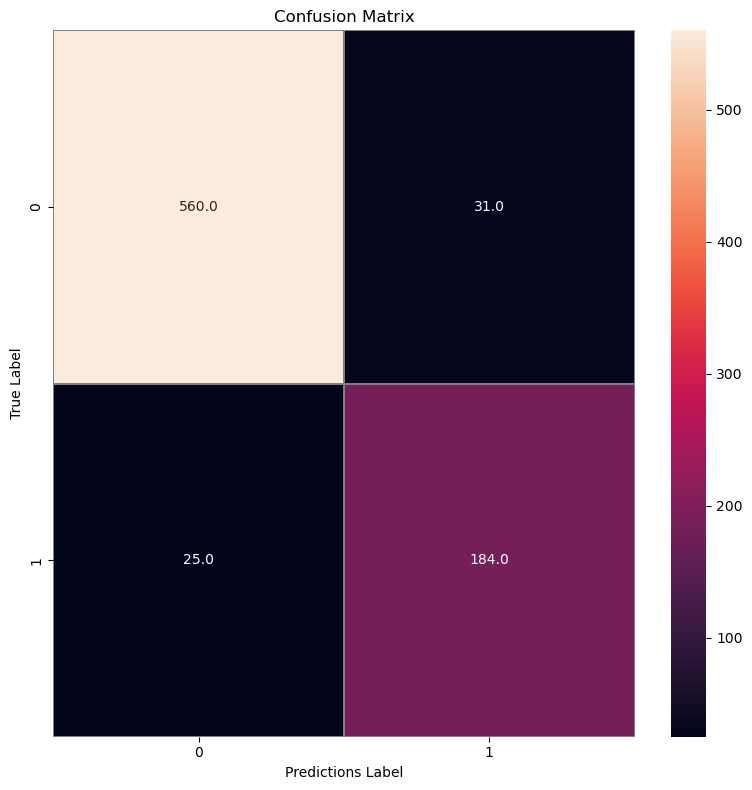

In [27]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred) 
# Plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predictions Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.show()

In [28]:
#confusion_matx = metrics.confusion_matrix(y_test, y_pred)
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matx, display_labels = ["navire (0)","sans navire (1)"])

#cm_display.plot()
#plt.show()

In [30]:
 #metrics.accuracy_score(y_test, y_pred)

In [31]:
# On peut afficher la valeur de l'aire sur la courbe de la courbe ROC dans sklearn.metrics.
# On va importer "roc_auc_score" et on va faire un "KNN.predict_proba de notre test mise à échelle (X_test_scaler)", placer ça dans y_score.
# roc_auc_score dans laquelle on va comparer "y_test avec y_score de la probabilité"

#from sklearn.metrics import roc_auc_score
#y_score = KNN.predict_proba(X_test_scaler)
#roc_auc_score(y_test, y_score.multi_class = "ovr")
